* Density estimator is an algorithm which takes a  D -dimensional dataset and produces an estimate of the  D -dimensional probability distribution which that data is drawn from. 
 
* Kernel density estimation (KDE) is in some senses an algorithm which takes the mixture-of-Gaussians idea to its logical extreme: it uses a mixture consisting of one Gaussian component per point, resulting in an essentially non-parametric estimator of density. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

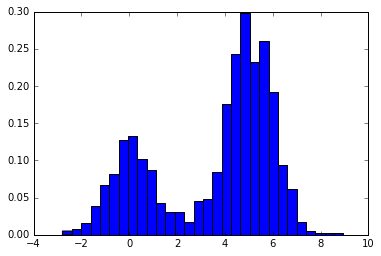

In [6]:
hist = plt.hist(x, bins=30, normed=True)

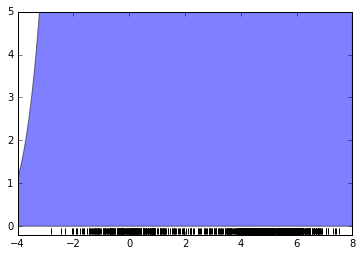

In [7]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

(-0.02, 0.22)

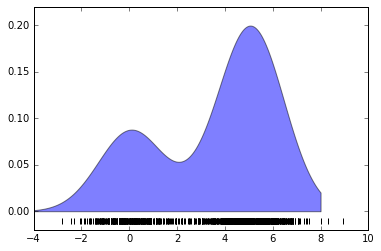

In [10]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
#logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#import sklearn.linear_model.perceptron as p
from sklearn.linear_model import perceptron
 
# Needed to show the plots inline
%matplotlib inline

In [12]:
# Data
d = np.array([
[2, 1, 2, 5, 7, 2, 3, 6, 1, 2, 5, 4, 6, 5],
[2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 7]
])
 
# Labels
t = np.array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1])

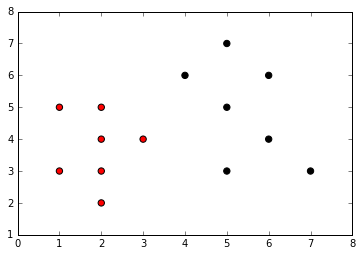

In [13]:
colormap = np.array(['r', 'k'])
plt.scatter(d[0], d[1], c=colormap[t], s=40)

In [14]:
# rotate the data 180 degrees
d90 = np.rot90(d)
d90 = np.rot90(d90)
#d90 = np.rot90(d90)
 
# Create the model
net = perceptron.Perceptron(n_iter=100, verbose=0, random_state=None, fit_intercept=True, eta0=0.002)
net.fit(d90,t)
 
# Print the results
print "Prediction " + str(net.predict(d90))
print "Actual     " + str(t)
print "Accuracy   " + str(net.score(d90, t)*100) + "%"

ValueError: Found arrays with inconsistent numbers of samples: [ 2 14]